# Data Preprocessing
### Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('data.csv')

# Data Exploration

### Getting Info about the data

In [2]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data.shape

(10000, 14)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### Checking if any Missing Data

In [6]:
data.isnull().values.any().sum()

0

### Removing of Columns that are not used for classification

In [7]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
data = data.drop(columns=['RowNumber','CustomerId','Surname'])

In [9]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Checking of Character data column or Numerical data column

In [10]:
data.select_dtypes(include='object').columns

Index(['Geography', 'Gender'], dtype='object')

In [11]:
data.select_dtypes(include=['float64','int64']).columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

### Changing Character data to numerical data using (One Hot Encoding)

In [12]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
data = pd.get_dummies(data=data,drop_first=True)

In [14]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


### To get Countplot

<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

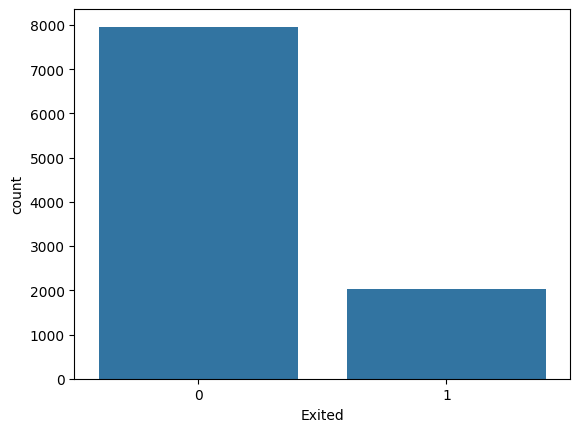

In [15]:
sns.countplot(x='Exited',data=data)
plt.plot

In [16]:
(data.Exited ==0).sum()

7963

In [17]:
(data.Exited ==1).sum()

2037

### Correlation Matrix

In [18]:
data_features = data.drop(columns="Exited")

<Axes: title={'center': 'Correlation Matrix'}>

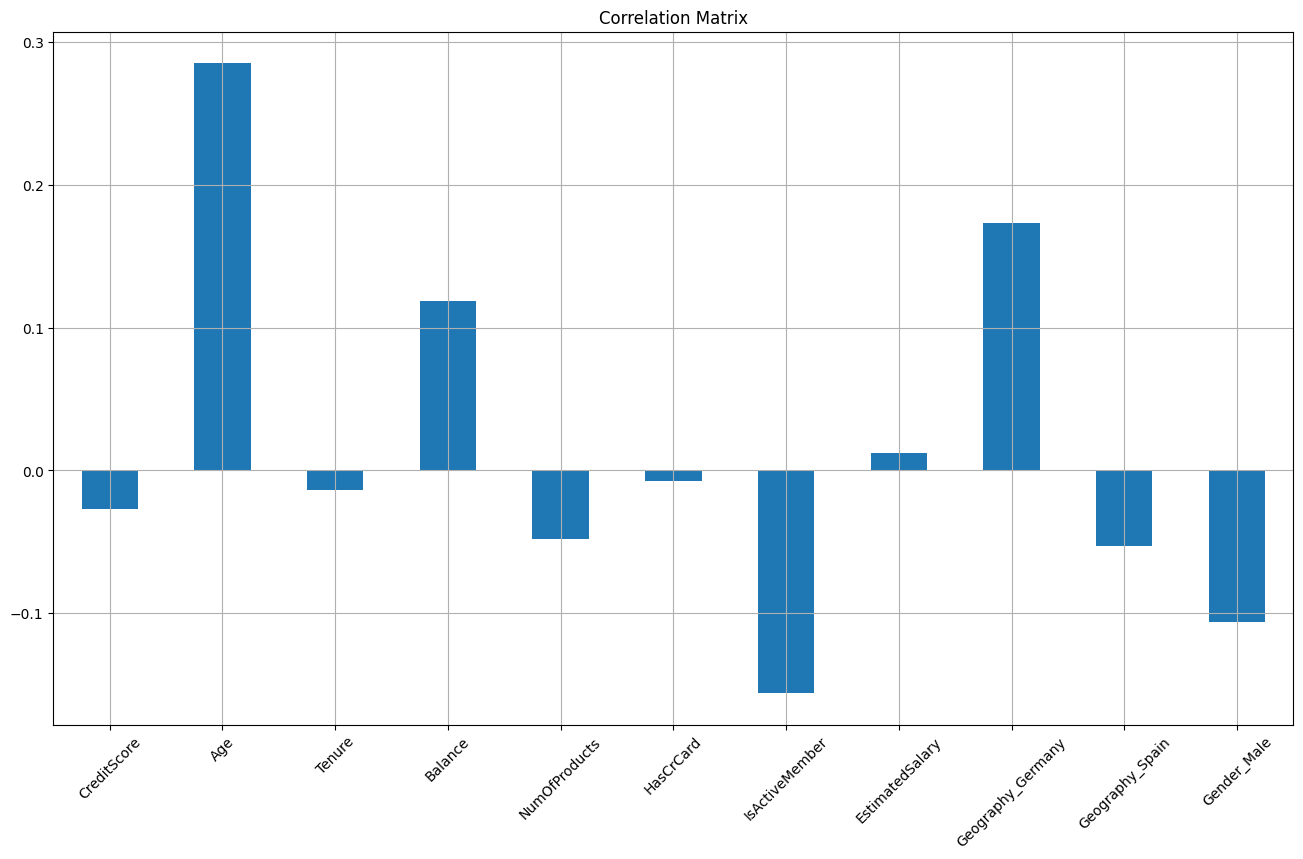

In [19]:
data_features.corrwith(data["Exited"]).plot.bar(
    figsize = (16,9),
    title = "Correlation Matrix",
    rot = 45,
    grid=True,
)

### Heatmap

In [20]:
corr = data.corr()

<Axes: >

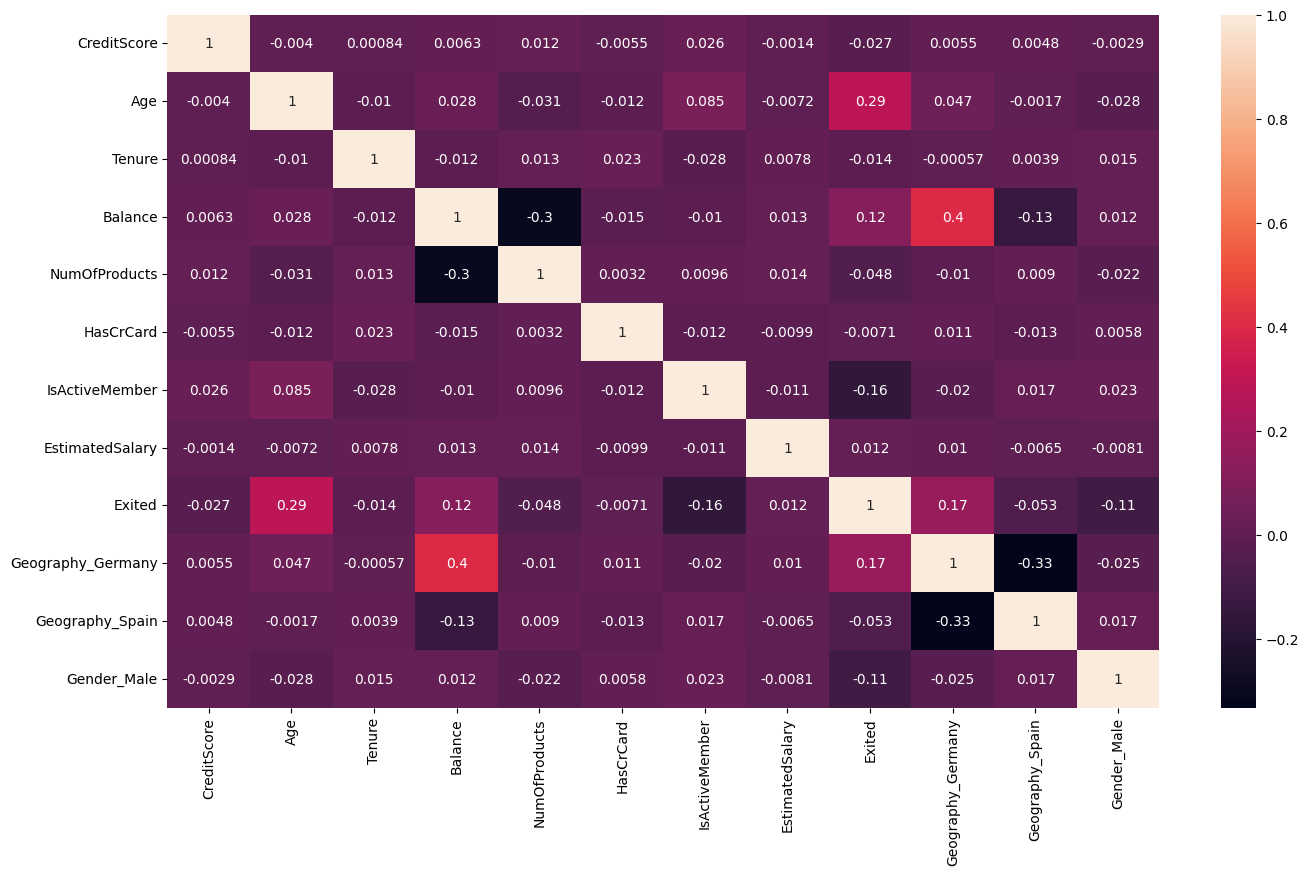

In [21]:
plt.figure(figsize=(16,9))
sns.heatmap(corr,annot=True)

### Train Test Split

In [22]:
from sklearn.model_selection import train_test_split
x=data.drop(columns="Exited")
y=data["Exited"]

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [24]:
x_test.shape

(2000, 11)

# Feature Scaling

### using StandardScaler

In [25]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

## 1. Using Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(random_state=0)
classifier_lr.fit(x_train,y_train)
y_pred = classifier_lr.predict(x_test)

In [27]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix
acc = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)

# Cross - val Score
from sklearn.model_selection import cross_val_score
score = cross_val_score(estimator=classifier_lr,X=x_train,y=y_train,cv=10)
avg_acc = score.mean()*100
avg_std = score.std()*100

In [28]:
result_1 = pd.DataFrame([["Logistic Regression",acc,f1,prec,rec,avg_acc,avg_std]],columns=["Model","Accuracy","F1 Score","Precision","Recall","Average Accuracy","Standard Devaition"])

In [29]:
result_1

,Model,Accuracy,F1 Score,Precision,Recall,Average Accuracy,Standard Devaition
0,Logistic Regression,0.811,0.336842,0.581818,0.237037,80.8375,0.878653


In [30]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[1526,   69],
       [ 309,   96]])

## 2. Using Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier
classifier_rm = RandomForestClassifier(random_state=0)
classifier_rm.fit(x_train,y_train)
y_pred = classifier_rm.predict(x_test)

In [32]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix
acc = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)

# Cross - val Score
from sklearn.model_selection import cross_val_score
score = cross_val_score(estimator=classifier_rm,X=x_train,y=y_train,cv=10)
avg_acc = score.mean()*100
avg_std = score.std()*100

In [33]:
result_2 = pd.DataFrame([["Random Forest",acc,f1,prec,rec,avg_acc,avg_std]],columns=["Model","Accuracy","F1 Score","Precision","Recall","Average Accuracy","Standard Devaition"])

In [34]:
result_2

,Model,Accuracy,F1 Score,Precision,Recall,Average Accuracy,Standard Devaition
0,Random Forest,0.867,0.613372,0.745583,0.520988,85.9625,1.018654


In [35]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[1523,   72],
       [ 194,  211]])

## 3. XGBoost Classifier

In [36]:
from xgboost import XGBClassifier
classifier_xgb = XGBClassifier(random_state=0)
classifier_xgb.fit(x_train,y_train)
y_pred = classifier_xgb.predict(x_test)

In [37]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix
acc = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)

# Cross - val Score
from sklearn.model_selection import cross_val_score
score = cross_val_score(estimator=classifier_xgb,X=x_train,y=y_train,cv=5)
avg_acc = score.mean()*100
avg_std = score.std()*100

In [38]:
result_3 = pd.DataFrame([["XGBoost",acc,f1,prec,rec,avg_acc,avg_std]],columns=["Model","Accuracy","F1 Score","Precision","Recall","Average Accuracy","Standard Devaition"])

In [39]:
result_3

,Model,Accuracy,F1 Score,Precision,Recall,Average Accuracy,Standard Devaition
0,XGBoost,0.8525,0.594223,0.670807,0.533333,85.075,0.85641


In [40]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[1489,  106],
       [ 189,  216]])

## 4. Using SVM

In [41]:
from sklearn.svm import SVC
classifier_svc = SVC(random_state=0)
classifier_svc.fit(x_train,y_train)
y_pred = classifier_svc.predict(x_test)

In [42]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix
acc = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)

# Cross - val Score
from sklearn.model_selection import cross_val_score
score = cross_val_score(estimator=classifier_svc,X=x_train,y=y_train,cv=10)
avg_acc = score.mean()*100
avg_std = score.std()*100

In [43]:
result_4 = pd.DataFrame([["SVC",acc,f1,prec,rec,avg_acc,avg_std]],columns=["Model","Accuracy","F1 Score","Precision","Recall","Average Accuracy","Standard Devaition"])

In [44]:
result_4

,Model,Accuracy,F1 Score,Precision,Recall,Average Accuracy,Standard Devaition
0,SVC,0.8635,0.56872,0.789474,0.444444,85.2375,1.031458


In [45]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[1547,   48],
       [ 225,  180]])

## 5. Using GaussianNB

In [46]:
from sklearn.naive_bayes import GaussianNB
classifier_gaussianNB = GaussianNB()
classifier_gaussianNB.fit(x_train,y_train)
y_pred = classifier_gaussianNB.predict(x_test)

In [47]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix
acc = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)

# Cross - val Score
from sklearn.model_selection import cross_val_score
score = cross_val_score(estimator=classifier_gaussianNB,X=x_train,y=y_train,cv=10)
avg_acc = score.mean()*100
avg_std = score.std()*100

In [48]:
result_5 = pd.DataFrame([["gaussianNB",acc,f1,prec,rec,avg_acc,avg_std]],columns=["Model","Accuracy","F1 Score","Precision","Recall","Average Accuracy","Standard Devaition"])

In [49]:
result_5

,Model,Accuracy,F1 Score,Precision,Recall,Average Accuracy,Standard Devaition
0,gaussianNB,0.8295,0.484115,0.625,0.395062,82.175,0.981389


In [50]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[1499,   96],
       [ 245,  160]])

## 6. Using DecisionTree

In [51]:
from sklearn.tree import DecisionTreeClassifier
classifier_tree = DecisionTreeClassifier(random_state=0)
classifier_tree.fit(x_train,y_train)
y_pred = classifier_tree.predict(x_test)

In [52]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix
acc = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)

# Cross - val Score
from sklearn.model_selection import cross_val_score
score = cross_val_score(estimator=classifier_tree,X=x_train,y=y_train,cv=10)
avg_acc = score.mean()*100
avg_std = score.std()*100

In [53]:
result_6 = pd.DataFrame([["DecisionTree",acc,f1,prec,rec,avg_acc,avg_std]],columns=["Model","Accuracy","F1 Score","Precision","Recall","Average Accuracy","Standard Devaition"])

In [54]:
result_6

,Model,Accuracy,F1 Score,Precision,Recall,Average Accuracy,Standard Devaition
0,DecisionTree,0.808,0.551402,0.523282,0.582716,78.7375,1.609008


In [55]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[1380,  215],
       [ 169,  236]])

# Hyperparameter Tuning (for Random Forest Classifier)

In [56]:
from sklearn.model_selection import RandomizedSearchCV

parameters = {
    'criterion' : ["gini", "entropy", "log_loss"],
    'max_depth' : [1,5,10,25,100],
    'max_features' : ["sqrt", "log2", None],
    'random_state' : [0,2,5,42],
}

randomized_search = RandomizedSearchCV(estimator=classifier_rm,param_distributions=parameters,n_iter=10,n_jobs=10,scoring='roc_auc',cv=5)
randomized_search.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
                   n_jobs=10,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [1, 5, 10, 25, 100],
                                        'max_features': ['sqrt', 'log2', None],
                                        'random_state': [0, 2, 5, 42]},
                   scoring='roc_auc')

In [57]:
randomized_search.best_estimator_ 

RandomForestClassifier(criterion='log_loss', max_depth=10, random_state=42)

# Final Model Selection with Hyperparameter : Random Forest

In [58]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(criterion='entropy', max_depth=10, max_features='log2',
                       random_state=2)
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

In [59]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix
acc = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)

# Cross - val Score
from sklearn.model_selection import cross_val_score
score = cross_val_score(estimator=classifier,X=x_train,y=y_train,cv=10)
avg_acc = score.mean()*100
avg_std = score.std()*100

In [60]:
get_result = pd.DataFrame([["Final Random Forest",acc,f1,prec,rec,avg_acc,avg_std]],columns=["Model","Accuracy","F1 Score","Precision","Recall","Average Accuracy","Standard Devaition"])

In [61]:
get_result

,Model,Accuracy,F1 Score,Precision,Recall,Average Accuracy,Standard Devaition
0,Final Random Forest,0.8675,0.596651,0.777778,0.483951,86.1,0.901041


In [62]:
all_results = [result_1,result_2,result_3,result_4,result_5,result_6,get_result]

In [63]:
final_results = pd.concat(all_results).reset_index(drop=True)

In [64]:
final_results

,Model,Accuracy,F1 Score,Precision,Recall,Average Accuracy,Standard Devaition
0,Logistic Regression,0.8110,0.336842,0.581818,0.237037,80.8375,0.878653
1,Random Forest,0.8670,0.613372,0.745583,0.520988,85.9625,1.018654
2,XGBoost,0.8525,0.594223,0.670807,0.533333,85.0750,0.856410
3,SVC,0.8635,0.568720,0.789474,0.444444,85.2375,1.031458
4,gaussianNB,0.8295,0.484115,0.625000,0.395062,82.1750,0.981389
5,DecisionTree,0.8080,0.551402,0.523282,0.582716,78.7375,1.609008
6,Final Random Forest,0.8675,0.596651,0.777778,0.483951,86.1000,0.901041


# Output on Sample Case

In [65]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [66]:
obj = [[750,40,2,80450.75,2,0,1,90000.00,0,1,1]]
result = classifier.predict(ss.transform(obj))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [67]:
result

array([0])